In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#### Dataset loading

In [79]:
dataset_url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
data = pd.read_csv(filepath_or_buffer=dataset_url)

#### Dataset samples preview

In [80]:
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


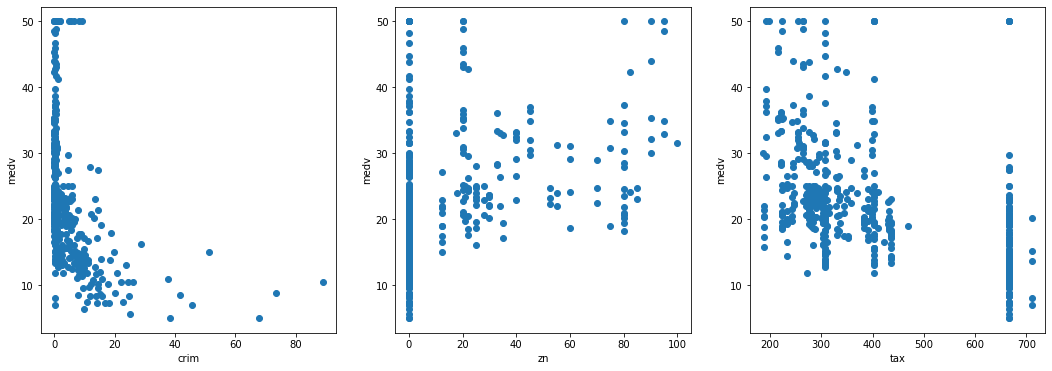

In [81]:
import matplotlib.pyplot as plt

fig, [ax1, ax2, ax3] = plt.subplots(1, 3)
fig.set_figwidth(18)
fig.set_figheight(6)

ax1.set_xlabel('crim')
ax1.set_ylabel('medv')
ax1.scatter(data[['crim']], data[['medv']])

ax2.set_xlabel('zn')
ax2.set_ylabel('medv')
ax2.scatter(data[['zn']], data[['medv']])

ax3.set_xlabel('tax')
ax3.set_ylabel('medv')
ax3.scatter(data[['tax']], data[['medv']])

#### Dataset split

In [82]:
X = data.drop('medv', axis=1)
y = data['medv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

#### Model preparation

In [83]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### Model prediction on test data

In [88]:
y_pred = model.predict(X_test)
print('y_pred: ', y_pred)
print('y_test: ', y_test.tolist())

y_pred:  [23.01506153 21.2115869  33.71590384 31.56542369  3.1826268   3.15381954
 27.40305304 22.2126176  14.86506114 21.34105453 30.95942941 26.70065029
 21.12624382 18.37282564 17.64315354 25.38194186 24.42970445 13.36957057
  8.66686786 18.57490534 21.73966467 20.34270529 36.5461105  20.59627495
 19.87979627 15.75766967 37.11632999 34.85897895 30.83458635 23.23441285
 18.68278505 20.749546   31.84560076 30.20214207 13.3861702  15.87078398
 13.70766096 23.74163998 25.95135088 23.18325878 28.99906539 12.50341936
 31.08347911  6.39401895 23.71801218 20.61523929 33.15362417 19.21862493
 35.89603081  0.82365329 31.90288611 31.69640543  6.58849712 34.62762996
 20.41162545 19.69277608 19.53445865 18.58689088 15.81420496 22.98764309
 19.65947045 16.36377019 18.48783369 32.76568172 35.49022568 24.58349631
 41.5854766  32.94818456 14.60990256 27.43178268  8.04470074  5.61185652
 22.21428332 18.72817007 31.02824788 26.04494485 24.60357003 24.84231113
 25.38796252 24.87762205 33.71343923 19.72

#### Model evaluation

In [85]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
print(f'MSE: {mse:.4f}')

MSE: 18.4954


In [92]:
model_weights = model.coef_
model_weights

array([-1.08223557e-01,  3.89039349e-02, -1.51517627e-02,  3.15897941e+00,
       -1.65854070e+01,  3.63288486e+00,  9.35052187e-03, -1.38618151e+00,
        3.24065945e-01, -1.16245167e-02, -1.03644251e+00,  1.16127489e-02,
       -5.58409340e-01])